In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["target"] = housing.target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Eu tenho a hipótese de que alguns features desse dataset não têm muita relação com o target que é sobre o valor médio da casa em si, 
# como por exemplo a população. Acho que é bom fazer várias hipóteses para testar esse pensamento, em cada hipótese tirar ou não algumas features.

<Axes: >

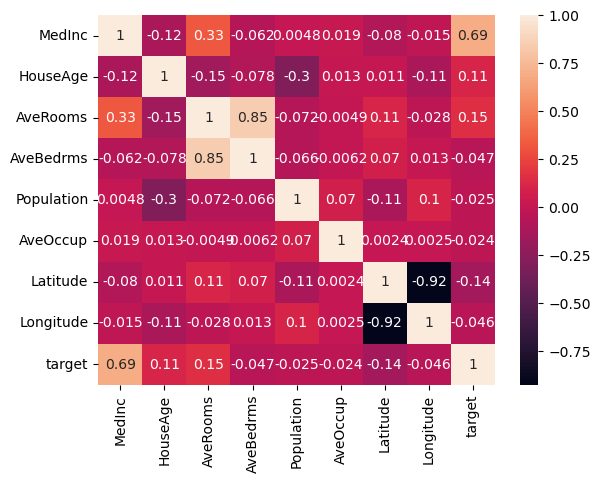

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 1.0, 'Método do Cotovelo')

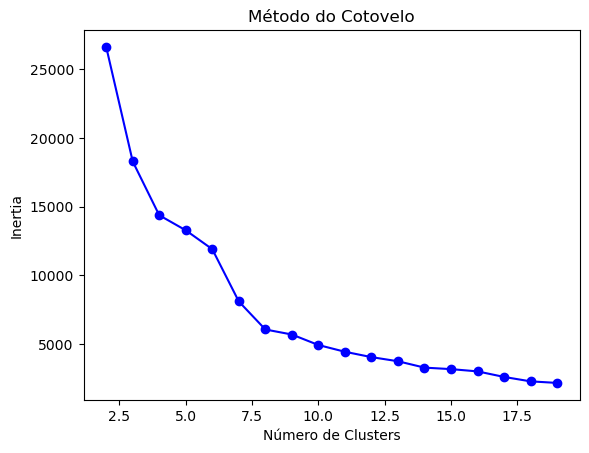

In [8]:
inertias = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(df[["Latitude","Longitude"]])
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')

In [9]:
kmeans = KMeans(n_clusters=7)
df["neighborhood_cluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])

In [10]:
df[df["neighborhood_cluster"]==6]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,neighborhood_cluster
1053,3.1142,12.0,5.538592,1.082254,4644.0,2.616338,39.76,-121.83,1.12600,6
1054,3.0068,23.0,5.230635,0.971279,2710.0,2.358573,39.76,-121.82,1.07300,6
1055,3.0905,12.0,5.122490,1.056225,3628.0,2.428380,39.78,-121.86,1.17800,6
1056,1.9362,17.0,4.397832,0.981651,2446.0,2.040033,39.77,-121.85,0.89900,6
1057,2.3155,14.0,4.290146,1.131387,1215.0,2.217153,39.76,-121.84,1.02300,6
...,...,...,...,...,...,...,...,...,...,...
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17,0.14999,6
19803,2.8472,27.0,12.320000,2.993333,396.0,2.640000,40.16,-123.22,0.41300,6
19804,2.7083,19.0,6.475000,1.350000,216.0,2.700000,40.34,-123.48,0.64500,6
19805,3.6250,20.0,3.594595,0.945946,87.0,2.351351,40.22,-123.43,0.67500,6


In [11]:
hipotese1 = df[["MedInc", "target"]].copy()
hipotese2 = df[["MedInc", "HouseAge", "AveRooms","target"]].copy()
hipotese3 = df[["MedInc", "HouseAge", "AveRooms", "Latitude", "Longitude", "target"]].copy()
hipotese4 = df[["MedInc", "HouseAge", "AveRooms", "neighborhood_cluster", "target"]].copy()
hipotese5 = df.copy()

In [12]:
hipotese1["MedIncMinMax"] = (hipotese1["MedInc"] - hipotese1["MedInc"].min()) / (hipotese1["MedInc"].max() - hipotese1["MedInc"].min())
hipotese1["MedIncZscore"] = (hipotese1["MedInc"] - hipotese1["MedInc"].mean()) / hipotese1["MedInc"].std()

##########################################################################################################

hipotese2["MedIncMinMax"] = (hipotese2["MedInc"] - hipotese2["MedInc"].min()) / (hipotese2["MedInc"].max() - hipotese2["MedInc"].min())
hipotese2["MedIncZscore"] = (hipotese2["MedInc"] - hipotese2["MedInc"].mean()) / hipotese2["MedInc"].std()

hipotese2["HouseAgeMinMax"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].min()) / (hipotese2["HouseAge"].max() - hipotese2["HouseAge"].min())
hipotese2["HouseAgeZscore"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].mean()) / hipotese2["HouseAge"].std()

hipotese2["AveRoomsMinMax"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].min()) / (hipotese2["AveRooms"].max() - hipotese2["AveRooms"].min())
hipotese2["AveRoomsZscore"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].mean()) / hipotese2["AveRooms"].std()

############################################################################################################

hipotese3["MedIncMinMax"] = (hipotese3["MedInc"] - hipotese3["MedInc"].min()) / (hipotese3["MedInc"].max() - hipotese3["MedInc"].min())
hipotese3["MedIncZscore"] = (hipotese3["MedInc"] - hipotese3["MedInc"].mean()) / hipotese3["MedInc"].std()

hipotese3["HouseAgeMinMax"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].min()) / (hipotese3["HouseAge"].max() - hipotese3["HouseAge"].min())
hipotese3["HouseAgeZscore"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].mean()) / hipotese3["HouseAge"].std()

hipotese3["AveRoomsMinMax"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].min()) / (hipotese3["AveRooms"].max() - hipotese3["AveRooms"].min())
hipotese3["AveRoomsZscore"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].mean()) / hipotese3["AveRooms"].std()

hipotese3["LatitudeMinMax"] = (hipotese3["Latitude"] - hipotese3["Latitude"].min()) / (hipotese3["Latitude"].max() - hipotese3["Latitude"].min())
hipotese3["LatitudeZscore"] = (hipotese3["Latitude"] - hipotese3["Latitude"].mean()) / hipotese3["Latitude"].std()

hipotese3["LongitudeMinMax"] = (hipotese3["Longitude"] - hipotese3["Longitude"].min()) / (hipotese3["Longitude"].max() - hipotese3["Longitude"].min())
hipotese3["LongitudeZscore"] = (hipotese3["Longitude"] - hipotese3["Longitude"].mean()) / hipotese3["Longitude"].std()

############################################################################################################

hipotese4["MedIncMinMax"] = (hipotese4["MedInc"] - hipotese4["MedInc"].min()) / (hipotese4["MedInc"].max() - hipotese4["MedInc"].min())
hipotese4["MedIncZscore"] = (hipotese4["MedInc"] - hipotese4["MedInc"].mean()) / hipotese4["MedInc"].std()

hipotese4["HouseAgeMinMax"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].min()) / (hipotese4["HouseAge"].max() - hipotese4["HouseAge"].min())
hipotese4["HouseAgeZscore"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].mean()) / hipotese4["HouseAge"].std()

hipotese4["AveRoomsMinMax"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].min()) / (hipotese4["AveRooms"].max() - hipotese4["AveRooms"].min())
hipotese4["AveRoomsZscore"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].mean()) / hipotese4["AveRooms"].std()

hipotese4["NeighClusterMinMax"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].min()) / (hipotese4["neighborhood_cluster"].max() - hipotese4["neighborhood_cluster"].min())
hipotese4["NeighClusterZscore"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].mean()) / hipotese4["neighborhood_cluster"].std()

############################################################################################################

hipotese5["MedIncMinMax"] = (hipotese5["MedInc"] - hipotese5["MedInc"].min()) / (hipotese5["MedInc"].max() - hipotese5["MedInc"].min())
hipotese5["MedIncZscore"] = (hipotese5["MedInc"] - hipotese5["MedInc"].mean()) / hipotese5["MedInc"].std()

hipotese5["HouseAgeMinMax"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].min()) / (hipotese5["HouseAge"].max() - hipotese5["HouseAge"].min())
hipotese5["HouseAgeZscore"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].mean()) / hipotese5["HouseAge"].std()

hipotese5["AveRoomsMinMax"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].min()) / (hipotese5["AveRooms"].max() - hipotese5["AveRooms"].min())
hipotese5["AveRoomsZscore"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].mean()) / hipotese5["AveRooms"].std()

hipotese5["AveBedrmsMinMax"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].min()) / (hipotese5["AveBedrms"].max() - hipotese5["AveBedrms"].min())
hipotese5["AveBedrmsZscore"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].mean()) / hipotese5["AveBedrms"].std()

hipotese5["PopulationMinMax"] = (hipotese5["Population"] - hipotese5["Population"].min()) / (hipotese5["Population"].max() - hipotese5["Population"].min())
hipotese5["PopulationZscore"] = (hipotese5["Population"] - hipotese5["Population"].mean()) / hipotese5["Population"].std()

hipotese5["AveOccupMinMax"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].min()) / (hipotese5["AveOccup"].max() - hipotese5["AveOccup"].min())
hipotese5["AveOccupZscore"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].mean()) / hipotese5["AveOccup"].std()

hipotese5["LatitudeMinMax"] = (hipotese5["Latitude"] - hipotese5["Latitude"].min()) / (hipotese5["Latitude"].max() - hipotese5["Latitude"].min())
hipotese5["LatitudeZscore"] = (hipotese5["Latitude"] - hipotese5["Latitude"].mean()) / hipotese5["Latitude"].std()

hipotese5["LongitudeMinMax"] = (hipotese5["Longitude"] - hipotese5["Longitude"].min()) / (hipotese5["Longitude"].max() - hipotese5["Longitude"].min())
hipotese5["LongitudeZscore"] = (hipotese5["Longitude"] - hipotese5["Longitude"].mean()) / hipotese5["Longitude"].std()

hipotese5.drop(columns=["neighborhood_cluster"],inplace=True)



In [13]:
######################################################################
### Tentativa de fazer a Descida de gradiente no primeiro exemplo ####
######################################################################

In [14]:
nIteracoes = 100000
α = 0.001 #taxa de aprendizado
theta0 = 0
theta1 = 0

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    hipotese1["MedInc"].values,
    hipotese2["target"].values,
    test_size=0.2,
    random_state=69
)

m = len(X_train)

In [16]:
# Implementação da Descida de Gradiente

for n in range(nIteracoes):
    # Calcular vetor previsões
    previsoes = theta0 + theta1 * X_train

    # Calcular vetor erros
    erros = previsoes - Y_train

    # Calcular derivadas parciais
    derivadaTheta0 = (1/m) * erros.sum()
    derivadaTheta1 = (1/m) * (erros * X_train).sum()

    # Atualizar parâmetros (SUBTRAÇÃO com taxa de aprendizado)
    theta0 = theta0 - α * derivadaTheta0
    theta1 = theta1 - α * derivadaTheta1

In [17]:
previsoes_teste = theta0 + theta1 * X_test

mse = np.mean((previsoes_teste - Y_test)**2)
print(f"Erro quadrático médio no teste: {mse:.2f}")
print(f"RMSE (raiz do erro quadrático médio): {np.sqrt(mse):.2f}")
print(f"\nParâmetros do modelo:")
print(f"theta0 (intercepto): {theta0:.4f}")
print(f"theta1 (coeficiente): {theta1:.4f}")

Erro quadrático médio no teste: 0.69
RMSE (raiz do erro quadrático médio): 0.83

Parâmetros do modelo:
theta0 (intercepto): 0.4568
theta1 (coeficiente): 0.4168


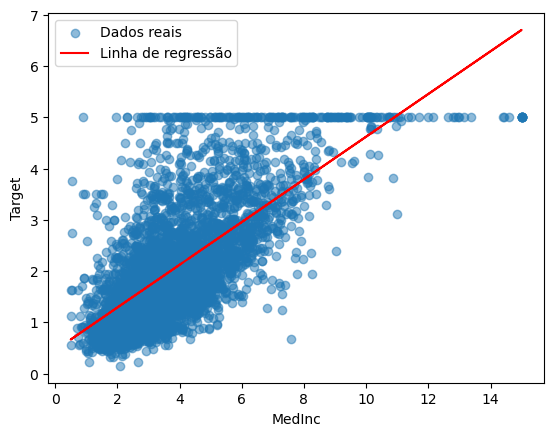

In [18]:
plt.scatter(X_test, Y_test, alpha=0.5, label='Dados reais')
plt.plot(X_test, previsoes_teste, 'r-', label='Linha de regressão')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.legend()
plt.show()

In [19]:
##################################################################
######### Fim da implementação de Descida de Gradiente ##########
##################################################################

In [20]:
# Pensei em implementar algo para fazer as regressões de múltiplas variáveis 
# mas acho melhor começar a brincar com os métodos do scikit-learn afinal de contas
# é uma biblioteca já bastante usada.

In [21]:
len(hipotese2)

20640

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [23]:
modelos = {
    'SGD Linear': SGDRegressor(penalty=None, alpha=0.001, random_state=69),
    'SGD Ridge': SGDRegressor(penalty='l2', alpha=0.001, random_state=69),
    'SGD Lasso': SGDRegressor(penalty='l1', alpha=0.001, random_state=69),
    'SGD ElasticNet': SGDRegressor(penalty='elasticnet', alpha=0.001, l1_ratio=0.5, random_state=69)
}

In [24]:
for nome,modelo in modelos.items():
    features = ["MedIncMinMax","HouseAgeMinMax", "AveRoomsMinMax"]
    X = hipotese2[features]
    Y = hipotese2["target"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

    modelo.fit(X_train, Y_train)
    pred = modelo.predict(X_test)
    print(f"{nome}: RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")




for nome,modelo in modelos.items():
    features = ["MedIncZscore","HouseAgeZscore", "AveRoomsZscore"]
    X = hipotese2[features]
    Y = hipotese2["target"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

    modelo.fit(X_train, Y_train)
    pred = modelo.predict(X_test)
    print(f"{nome}: RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")

SGD Linear: RMSE = 0.807
SGD Ridge: RMSE = 0.810
SGD Lasso: RMSE = 0.808
SGD ElasticNet: RMSE = 0.809
SGD Linear: RMSE = 0.803
SGD Ridge: RMSE = 0.803
SGD Lasso: RMSE = 0.803
SGD ElasticNet: RMSE = 0.803


In [25]:
# Terminada a implementação de relações lineares para o conjunto de dados, percebe-se que houve uma ligeira melhora na modelagem (0.83 vs 0.803)
# com o maior número de features, uso de algoritmos e também de técnicas de normalização dos dados MinMax e ZScore.
# Preciso agora implementar a regressão polinomial (regressões de maiores ordens) que teoricamente serão melhores
# para captar as relações não lineares dos dados desse conjunto.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve


In [27]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [28]:
grausPolinomiais = [1,2,3,4,5]

In [29]:
hipotese2[["MedIncZscore", "HouseAgeZscore", "AveRoomsZscore"]]

,MedIncZscore,HouseAgeZscore,AveRoomsZscore
0,2.344709,0.982119,0.628544
1,2.332181,-0.607004,0.327033
2,1.782656,1.856137,1.155592
3,0.932945,1.856137,0.156962
4,-0.012881,1.856137,0.344702
...,...,...,...
20635,-1.216099,-0.289180,-0.155020
20636,-0.691576,-0.845373,0.276874
20637,-1.142566,-0.924829,-0.090316
20638,-1.054557,-0.845373,-0.040210


In [30]:
for grau in grausPolinomiais:
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_poly = poly.fit_transform(hipotese2[["MedIncZscore", "HouseAgeZscore", "AveRoomsZscore"]])
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, hipotese2["target"], test_size=0.2, random_state=69)

    modelos_poly = {
          'SGD Linear': SGDRegressor(penalty=None, alpha=0.0001, random_state=69, max_iter=100000, learning_rate="optimal"),
          'SGD Ridge': SGDRegressor(penalty='l2', alpha=0.0001,  random_state=69, max_iter=100000, learning_rate="optimal"),
          'SGD Lasso': SGDRegressor(penalty='l1', alpha=0.0001, random_state=69, max_iter=100000, learning_rate="optimal"),
          'SGD ElasticNet': SGDRegressor(penalty='elasticnet', alpha=0.0001, l1_ratio=0.5, random_state=69, max_iter=100000, learning_rate="optimal")
    }

    modelos_regularizados = {
      'Linear (sem reg)': LinearRegression(),
      'Ridge': Ridge(alpha=0.001, max_iter=10000),
      'Lasso': Lasso(alpha=0.001, max_iter=10000),
      'Elastic': ElasticNet(alpha=0.001, max_iter=10000)
    }

    for nome,modelo in modelos_poly.items():
        X = X_poly
        Y = hipotese2["target"]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        print(f"O grau polinomial é:{grau} e o algoritmo usado:{nome} com RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")
    
    
    for nome, modelo in modelos_regularizados.items():
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        print(f"{nome}: RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")


    

O grau polinomial é:1 e o algoritmo usado:SGD Linear com RMSE = 22.889


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


O grau polinomial é:1 e o algoritmo usado:SGD Ridge com RMSE = 8866.643
O grau polinomial é:1 e o algoritmo usado:SGD Lasso com RMSE = 0.811
O grau polinomial é:1 e o algoritmo usado:SGD ElasticNet com RMSE = 246920.652
Linear (sem reg): RMSE = 0.802
Ridge: RMSE = 0.802
Lasso: RMSE = 0.802
Elastic: RMSE = 0.802
O grau polinomial é:2 e o algoritmo usado:SGD Linear com RMSE = 6557366821184.483
O grau polinomial é:2 e o algoritmo usado:SGD Ridge com RMSE = 6984053021891.356
O grau polinomial é:2 e o algoritmo usado:SGD Lasso com RMSE = 6557366822009.321
O grau polinomial é:2 e o algoritmo usado:SGD ElasticNet com RMSE = 7107152062779.215
Linear (sem reg): RMSE = 0.787
Ridge: RMSE = 0.787
Lasso: RMSE = 0.786
Elastic: RMSE = 0.787
O grau polinomial é:3 e o algoritmo usado:SGD Linear com RMSE = 100932385540258448.000
O grau polinomial é:3 e o algoritmo usado:SGD Ridge com RMSE = 81651300276897712.000
O grau polinomial é:3 e o algoritmo usado:SGD Lasso com RMSE = 100932542025955168.000
O grau

/usr/lib/python3/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.18137e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.636e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 0.756


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.627e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Elastic: RMSE = 0.756
O grau polinomial é:5 e o algoritmo usado:SGD Linear com RMSE = 437482441147311013756928.000
O grau polinomial é:5 e o algoritmo usado:SGD Ridge com RMSE = 129868959313349014716416.000
O grau polinomial é:5 e o algoritmo usado:SGD Lasso com RMSE = 437482441121287874019328.000
O grau polinomial é:5 e o algoritmo usado:SGD ElasticNet com RMSE = 403493856277506407006208.000
Linear (sem reg): RMSE = 0.866
Ridge: RMSE = 0.866


/usr/lib/python3/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.48001e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.618e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 0.770
Elastic: RMSE = 0.769


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.598e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


In [31]:
hipotese2["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [32]:
# Conseguimos diminuir o erro da modelagem implementando polinomiais, diminuímos o erro quadrático médio de 0.8 para 0.752.
# O problema é que pensando-se no target esse erro é muito alto já que os valores de target não são grandes.

In [33]:
hipotese3.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'target',
       'MedIncMinMax', 'MedIncZscore', 'HouseAgeMinMax', 'HouseAgeZscore',
       'AveRoomsMinMax', 'AveRoomsZscore', 'LatitudeMinMax', 'LatitudeZscore',
       'LongitudeMinMax', 'LongitudeZscore'],
      dtype='object')

In [34]:
hipotese4.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'neighborhood_cluster', 'target',
       'MedIncMinMax', 'MedIncZscore', 'HouseAgeMinMax', 'HouseAgeZscore',
       'AveRoomsMinMax', 'AveRoomsZscore', 'NeighClusterMinMax',
       'NeighClusterZscore'],
      dtype='object')

In [35]:
hipotese4.drop(columns=['NeighClusterMinMax', 'NeighClusterZscore'], inplace=True)

In [36]:
hipotese4.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'neighborhood_cluster', 'target',
       'MedIncMinMax', 'MedIncZscore', 'HouseAgeMinMax', 'HouseAgeZscore',
       'AveRoomsMinMax', 'AveRoomsZscore'],
      dtype='object')

In [37]:
hipotese4_encoded = hipotese4.copy()

In [38]:
hipotese4_encoded = pd.get_dummies(hipotese4_encoded, columns=['neighborhood_cluster'], prefix='cluster')

In [39]:
hipotese4_encoded

,MedInc,HouseAge,AveRooms,target,MedIncMinMax,MedIncZscore,HouseAgeMinMax,HouseAgeZscore,AveRoomsMinMax,AveRoomsZscore,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,8.3252,41.0,6.984127,4.526,0.539668,2.344709,0.784314,0.982119,0.043512,0.628544,True,False,False,False,False,False,False
1,8.3014,21.0,6.238137,3.585,0.538027,2.332181,0.392157,-0.607004,0.038224,0.327033,True,False,False,False,False,False,False
2,7.2574,52.0,8.288136,3.521,0.466028,1.782656,1.000000,1.856137,0.052756,1.155592,True,False,False,False,False,False,False
3,5.6431,52.0,5.817352,3.413,0.354699,0.932945,1.000000,1.856137,0.035241,0.156962,True,False,False,False,False,False,False
4,3.8462,52.0,6.281853,3.422,0.230776,-0.012881,1.000000,1.856137,0.038534,0.344702,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,0.781,0.073130,-1.216099,0.470588,-0.289180,0.029769,-0.155020,False,False,False,False,True,False,False
20636,2.5568,18.0,6.114035,0.771,0.141853,-0.691576,0.333333,-0.845373,0.037344,0.276874,False,False,False,False,True,False,False
20637,1.7000,17.0,5.205543,0.923,0.082764,-1.142566,0.313725,-0.924829,0.030904,-0.090316,False,False,False,False,True,False,False
20638,1.8672,18.0,5.329513,0.847,0.094295,-1.054557,0.333333,-0.845373,0.031783,-0.040210,False,False,False,False,True,False,False


In [40]:
# Foram codificados os neighborhood_cluster da hipotese4
# vamos começar os trabalhos com a hipotese3.

In [41]:
hipotese3

,MedInc,HouseAge,AveRooms,Latitude,Longitude,target,MedIncMinMax,MedIncZscore,HouseAgeMinMax,HouseAgeZscore,AveRoomsMinMax,AveRoomsZscore,LatitudeMinMax,LatitudeZscore,LongitudeMinMax,LongitudeZscore
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,0.539668,2.344709,0.784314,0.982119,0.043512,0.628544,0.567481,1.052523,0.211155,-1.327803
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,0.538027,2.332181,0.392157,-0.607004,0.038224,0.327033,0.565356,1.043159,0.212151,-1.322812
2,7.2574,52.0,8.288136,37.85,-122.24,3.521,0.466028,1.782656,1.000000,1.856137,0.052756,1.155592,0.564293,1.038478,0.210159,-1.332794
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,0.354699,0.932945,1.000000,1.856137,0.035241,0.156962,0.564293,1.038478,0.209163,-1.337785
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,0.230776,-0.012881,1.000000,1.856137,0.038534,0.344702,0.564293,1.038478,0.209163,-1.337785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48,-121.09,0.781,0.073130,-1.216099,0.470588,-0.289180,0.029769,-0.155020,0.737513,1.801603,0.324701,-0.758808
20636,2.5568,18.0,6.114035,39.49,-121.21,0.771,0.141853,-0.691576,0.333333,-0.845373,0.037344,0.276874,0.738576,1.806285,0.312749,-0.818702
20637,1.7000,17.0,5.205543,39.43,-121.22,0.923,0.082764,-1.142566,0.313725,-0.924829,0.030904,-0.090316,0.732200,1.778194,0.311753,-0.823693
20638,1.8672,18.0,5.329513,39.43,-121.32,0.847,0.094295,-1.054557,0.333333,-0.845373,0.031783,-0.040210,0.732200,1.778194,0.301793,-0.873605


In [42]:
hipotese3.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'target',
       'MedIncMinMax', 'MedIncZscore', 'HouseAgeMinMax', 'HouseAgeZscore',
       'AveRoomsMinMax', 'AveRoomsZscore', 'LatitudeMinMax', 'LatitudeZscore',
       'LongitudeMinMax', 'LongitudeZscore'],
      dtype='object')

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparar os três conjuntos de features
X_sem_norm = hipotese3[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
X_minmax = hipotese3[['MedIncMinMax', 'HouseAgeMinMax', 'AveRoomsMinMax',
                        'LatitudeMinMax', 'LongitudeMinMax']]
X_zscore = hipotese3[['MedIncZscore', 'HouseAgeZscore', 'AveRoomsZscore',
                        'LatitudeZscore', 'LongitudeZscore']]
y = hipotese3['target']

# Lista para armazenar resultados
resultados = []

# Treinar as três versões
for nome, X in [("Sem Normalização", X_sem_norm),
                ("MinMax", X_minmax),
                ("Z-score", X_zscore)]:

    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.2, random_state=69)

    # Criar e treinar modelo
    tree = DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=69
    )
    tree.fit(X_train, y_train)

    # Avaliar
    y_pred = tree.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        'nome': nome,
        'rmse': rmse,
        'r2': r2,
        'profundidade': tree.get_depth(),
        'n_folhas': tree.get_n_leaves()
    })

    print(f"{nome}: RMSE={rmse:.3f}, R²={r2:.3f}")

# Verificar se os resultados são idênticos
print("\n✓ Confirmação: Todas as árvores produzem resultados idênticos!")
print("  Isso prova que árvores de decisão são invariantes à escala.")

Sem Normalização: RMSE=0.611, R²=0.722
MinMax: RMSE=0.611, R²=0.722
Z-score: RMSE=0.611, R²=0.721

✓ Confirmação: Todas as árvores produzem resultados idênticos!
  Isso prova que árvores de decisão são invariantes à escala.


In [44]:
# Comaparação com regressão linear SGD e regressão linear polinomial.

In [45]:
for grau in grausPolinomiais:
    print(f"Grau Polinomial: {grau}")
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_poly = poly.fit_transform(X_minmax)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, hipotese3["target"], test_size=0.2, random_state=69)

    modelos_regularizados = {
      'Linear (sem reg)': LinearRegression(),
      'Ridge': Ridge(alpha=0.001, max_iter=10000),
      'Lasso': Lasso(alpha=0.001, max_iter=10000),
      'Elastic': ElasticNet(alpha=0.001, max_iter=10000)
    }
    
    for nome, modelo in modelos_regularizados.items():
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        print(f"{nome}: RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")
    
    print("---------------------------------------------------------------------------")

Grau Polinomial: 1
Linear (sem reg): RMSE = 0.734
Ridge: RMSE = 0.734
Lasso: RMSE = 0.735
Elastic: RMSE = 0.737
---------------------------------------------------------------------------
Grau Polinomial: 2
Linear (sem reg): RMSE = 0.702
Ridge: RMSE = 0.701
Lasso: RMSE = 0.730
Elastic: RMSE = 0.731
---------------------------------------------------------------------------
Grau Polinomial: 3
Linear (sem reg): RMSE = 0.681
Ridge: RMSE = 0.703
Lasso: RMSE = 0.723
Elastic: RMSE = 0.724
---------------------------------------------------------------------------
Grau Polinomial: 4
Linear (sem reg): RMSE = 0.719
Ridge: RMSE = 0.686
Lasso: RMSE = 0.719
Elastic: RMSE = 0.716
---------------------------------------------------------------------------
Grau Polinomial: 5
Linear (sem reg): RMSE = 6.850
Ridge: RMSE = 0.670
Lasso: RMSE = 0.713
Elastic: RMSE = 0.712
---------------------------------------------------------------------------


In [ ]:
for grau in grausPolinomiais:
    print(f"Grau Polinomial: {grau}")
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_poly = poly.fit_transform(X_zscore)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, hipotese3["target"], test_size=0.2, random_state=69)

    modelos_regularizados = {
      'Linear (sem reg)': LinearRegression(),
      'Ridge': Ridge(alpha=0.001, max_iter=10000),
      'Lasso': Lasso(alpha=0.001, max_iter=10000),
      'Elastic': ElasticNet(alpha=0.001, max_iter=10000)
    }
    
    
    for nome, modelo in modelos_regularizados.items():
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        print(f"{nome}: RMSE = {np.sqrt(mean_squared_error(Y_test, pred)):.3f}")

    print("---------------------------------------------------------------------------")

Grau Polinomial: {grau}
Linear (sem reg): RMSE = 0.734
Ridge: RMSE = 0.734
Lasso: RMSE = 0.734
Elastic: RMSE = 0.734
---------------------------------------------------------------------------
Grau Polinomial: {grau}
Linear (sem reg): RMSE = 0.702
Ridge: RMSE = 0.702
Lasso: RMSE = 0.701
Elastic: RMSE = 0.701
---------------------------------------------------------------------------
Grau Polinomial: {grau}
Linear (sem reg): RMSE = 0.681
Ridge: RMSE = 0.681
Lasso: RMSE = 0.681
Elastic: RMSE = 0.682
---------------------------------------------------------------------------
Grau Polinomial: {grau}
Linear (sem reg): RMSE = 0.719


/usr/lib/python3/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.94435e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge: RMSE = 0.719


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.681e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 0.902


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.620e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Elastic: RMSE = 0.948
---------------------------------------------------------------------------
Grau Polinomial: {grau}
Linear (sem reg): RMSE = 6.850


/usr/lib/python3/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.39844e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge: RMSE = 6.852


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.504e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 2.878
Elastic: RMSE = 2.519
---------------------------------------------------------------------------


/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.435e+03, tolerance: 2.195e+00
  model = cd_fast.enet_coordinate_descent(


In [47]:
# Percebe-se nos testes feitos anteriormente alguns insights importantes:

# O teste do algoritmo de decision tree teve ótimos resultados, diminuindo o RSME em 0.15 pontos perante a hipotese2. Os outros testes feitos com os mesmos
# algoritmos antes testados também obtiveram melhora mas um pouco menor do que a decision tree.
# Isso mostra que tanto o aumento das features (adição de latitude e longitude) quanto a mudança de algoritmo de Regressão linear simples e polinomial para
# Árvore de decisão impactaram positivamente nas predissões deixando-as mais próximas do target.

In [ ]:
# Teste com Random Forest e XGBoost para hipótese3
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

print("=== Comparação de Algoritmos para Hipótese 3 ===")
print("Features: MedInc, HouseAge, AveRooms, Latitude, Longitude")
print("="*50)

# Preparar os dados (usando as mesmas normalizações dos testes anteriores)
X_sem_norm = hipotese3[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
X_minmax = hipotese3[['MedIncMinMax', 'HouseAgeMinMax', 'AveRoomsMinMax', 
                      'LatitudeMinMax', 'LongitudeMinMax']]
X_zscore = hipotese3[['MedIncZscore', 'HouseAgeZscore', 'AveRoomsZscore',
                      'LatitudeZscore', 'LongitudeZscore']]
y = hipotese3['target']

# Dicionário para armazenar todos os resultados
resultados_comparacao = {
    'Algoritmo': [],
    'Normalização': [],
    'RMSE': [],
    'R²': []
}

# Função auxiliar para treinar e avaliar
def treinar_e_avaliar(modelo, X, y, nome_modelo, nome_normalizacao):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=69
    )
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    resultados_comparacao['Algoritmo'].append(nome_modelo)
    resultados_comparacao['Normalização'].append(nome_normalizacao)
    resultados_comparacao['RMSE'].append(rmse)
    resultados_comparacao['R²'].append(r2)
    
    return rmse, r2

# 1. Decision Tree (já implementado, vamos incluir para comparação)
print("\n1. Decision Tree Regressor:")
for nome_norm, X in [("Sem Normalização", X_sem_norm), ("MinMax", X_minmax), ("Z-score", X_zscore)]:
    tree = DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=69
    )
    rmse, r2 = treinar_e_avaliar(tree, X, y, "Decision Tree", nome_norm)
    print(f"   {nome_norm}: RMSE={rmse:.3f}, R²={r2:.3f}")

# 2. Random Forest
print("\n2. Random Forest Regressor:")
for nome_norm, X in [("Sem Normalização", X_sem_norm), ("MinMax", X_minmax), ("Z-score", X_zscore)]:
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=69,
        n_jobs=-1  # usar todos os cores disponíveis
    )
    rmse, r2 = treinar_e_avaliar(rf, X, y, "Random Forest", nome_norm)
    print(f"   {nome_norm}: RMSE={rmse:.3f}, R²={r2:.3f}")

# 3. XGBoost
print("\n3. XGBoost Regressor:")
for nome_norm, X in [("Sem Normalização", X_sem_norm), ("MinMax", X_minmax), ("Z-score", X_zscore)]:
    xgb = XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=69,
        n_jobs=-1
    )
    rmse, r2 = treinar_e_avaliar(xgb, X, y, "XGBoost", nome_norm)
    print(f"   {nome_norm}: RMSE={rmse:.3f}, R²={r2:.3f}")

# 4. Comparação com melhores resultados anteriores de regressão polinomial
print("\n4. Melhor Regressão Polinomial (grau 3, Linear sem regularização):")
poly = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly.fit_transform(X_minmax)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=69)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
r2_poly = r2_score(y_test, y_pred)
print(f"   MinMax: RMSE={rmse_poly:.3f}, R²={r2_poly:.3f}")

resultados_comparacao['Algoritmo'].append("Regressão Polinomial (grau 3)")
resultados_comparacao['Normalização'].append("MinMax")
resultados_comparacao['RMSE'].append(rmse_poly)
resultados_comparacao['R²'].append(r2_poly)

# Criar DataFrame com resultados
df_resultados = pd.DataFrame(resultados_comparacao)
print("\n" + "="*50)
print("RESUMO DOS RESULTADOS:")
print("="*50)

# Ordenar por RMSE (menor é melhor)
df_resultados_sorted = df_resultados.sort_values('RMSE')
print(df_resultados_sorted.to_string(index=False))

# Encontrar o melhor modelo
melhor_modelo = df_resultados_sorted.iloc[0]
print(f"\n🏆 MELHOR MODELO: {melhor_modelo['Algoritmo']} com {melhor_modelo['Normalização']}")
print(f"   RMSE: {melhor_modelo['RMSE']:.3f}")
print(f"   R²: {melhor_modelo['R²']:.3f}")

# Calcular melhoria percentual em relação à árvore de decisão simples
rmse_tree = df_resultados[df_resultados['Algoritmo'] == 'Decision Tree']['RMSE'].iloc[0]
melhoria_percentual = ((rmse_tree - melhor_modelo['RMSE']) / rmse_tree) * 100
print(f"\n   Melhoria de {melhoria_percentual:.1f}% em relação à Decision Tree simples")

In [ ]:
# Visualização da comparação dos modelos
import matplotlib.pyplot as plt

# Criar gráfico de barras para comparar RMSE
plt.figure(figsize=(12, 6))

# Preparar dados para o gráfico
modelos_unicos = df_resultados_sorted['Algoritmo'].unique()
normalizacoes = ['Sem Normalização', 'MinMax', 'Z-score']

# Criar posições para as barras
x = np.arange(len(modelos_unicos))
width = 0.25

# Plotar barras para cada tipo de normalização
for i, norm in enumerate(normalizacoes):
    if norm in df_resultados_sorted['Normalização'].values:
        valores = []
        for modelo in modelos_unicos:
            resultado = df_resultados_sorted[
                (df_resultados_sorted['Algoritmo'] == modelo) & 
                (df_resultados_sorted['Normalização'] == norm)
            ]
            if not resultado.empty:
                valores.append(resultado['RMSE'].values[0])
            else:
                valores.append(np.nan)
        
        # Filtrar valores não-nan para plotar
        mask = ~np.isnan(valores)
        plt.bar(x[mask] + i*width, np.array(valores)[mask], width, label=norm)

plt.xlabel('Algoritmo')
plt.ylabel('RMSE')
plt.title('Comparação de RMSE entre Algoritmos e Normalizações - Hipótese 3')
plt.xticks(x + width, modelos_unicos, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Análise adicional: verificar se a normalização importa para cada algoritmo
print("\n" + "="*50)
print("ANÁLISE: Impacto da Normalização por Algoritmo")
print("="*50)

for algoritmo in ['Decision Tree', 'Random Forest', 'XGBoost']:
    resultados_algo = df_resultados[df_resultados['Algoritmo'] == algoritmo]
    if not resultados_algo.empty:
        rmse_values = resultados_algo['RMSE'].values
        diferenca_max = rmse_values.max() - rmse_values.min()
        print(f"\n{algoritmo}:")
        print(f"  Diferença entre normalizações: {diferenca_max:.4f}")
        print(f"  Conclusão: {'Invariante à escala' if diferenca_max < 0.01 else 'Sensível à escala'}")